In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


## Now lets take our output histograms and a nominal fast rotation distribution and use it to construct an overall loss probability vs. time

---

### First we get the loss probability histogram

In [97]:
#fin = r.TFile("./data/OutputHist_1234.root")
fin = r.TFile("./data/./OutputHist_123455_900000000_100.root")
fin = r.TFile("./OutputHist_123455_9000000_100000.root")
fin.ls()

c = fin.Get("c1")
print([x for x in c.GetListOfPrimitives()])
h = c.GetPrimitive("h").Clone("h")
h.SetDirectory(0)
print(h)

[<ROOT.TFrame object ("TFrame") at 0x7f73161974c0>, <ROOT.TH2D object ("h") at 0x7f730c0f7820>, <ROOT.TPaveText object ("title") at 0x7f731986a6a0>]
<ROOT.TH2D object ("h") at 0x7f73099e5110>
TFile**		./OutputHist_123455_9000000_100000.root	
 TFile*		./OutputHist_123455_9000000_100000.root	
  KEY: TCanvas	c1;1	c1


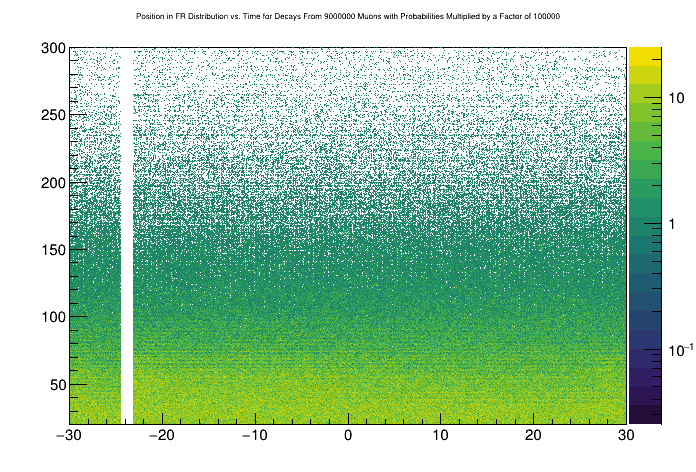

In [98]:
c = r.TCanvas()
print()
h.Draw("colz")
#h.GetZaxis().SetRangeUser(-1,1)
c.SetLogz()
c.Draw()

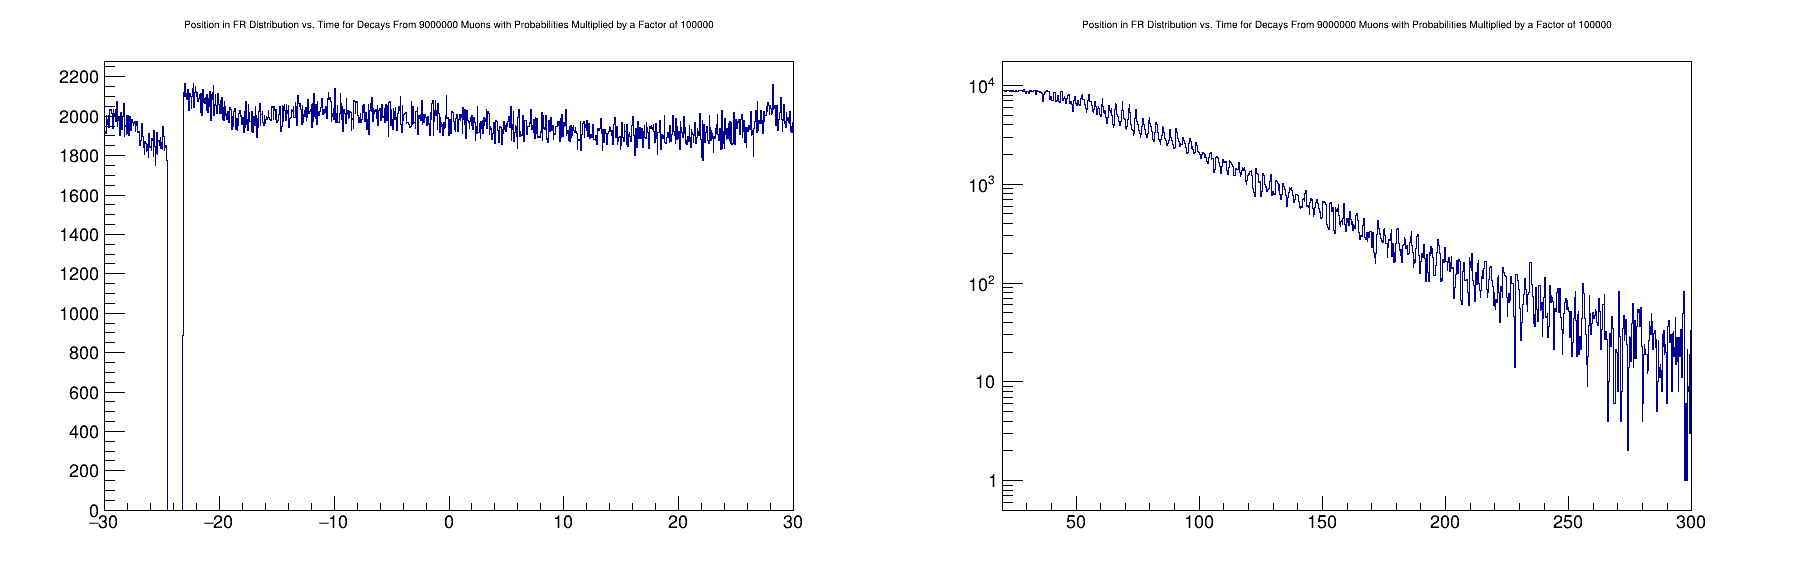

In [99]:
c = r.TCanvas("c","c",1800,600)
c.Divide(2)
c.cd(1)
h.ProjectionX("",
              h.GetYaxis().FindBin(20),
              h.GetYaxis().FindBin(300)
             ).Draw()
c.cd(2)
h.ProjectionY().Draw()
r.gPad.SetLogy()
c.Draw()

In [100]:
'''distributions = [ ['nominal', 30445, 'ding'], #name, fr run, root file
                  ['half_high', 30464, 'highMom_half_hists.root'],
                  ['half_low', 30466, 'lowMom_half_hists.root'],
                  ['third_high', 30468, 'highMom_third_hists.root'],
                  ['third_low', 30472, 'lowMom_third_hists.root'],
                  ['fifth_high', 30475, 'results_fifthCtag_highMomentum.root'],
                  ['fifth_low', 30479, 'results_fifthCtag_lowMomentum.root'],
                  ['fifth_high', 30475, 'highMom_fifth_hists.root'],
                  ['fifth_low', 30479, 'lowMom_fifth_hists.root'],
                  ['fifth_middle', 30483, 'midMom_fifth_hists.root']
                ]
'''

distributions = [ 
                    ['fifth_low', 30479, 'lowMom_fifth_hists.root'],
                    ['third_low', 30472, 'lowMom_third_hists.root'],
                    ['half_low', 30466, 'lowMom_half_hists.root'],
                    ['fifth_middle', 30483, 'midMom_fifth_hists.root'],
                    ['half_high', 30464, 'highMom_half_hists.root'],
                    ['third_high', 30468, 'highMom_third_hists.root'],
                    ['fifth_high', 30475, 'highMom_fifth_hists.root'],
                    #['nominal', 30445, 'ding']
                ]

nDists = len(distributions)

### Fast rotation distributions
---

In [101]:
frdists = []
for name, run, hist_file in distributions:
    f = r.TFile("./fastRotation/CornellFourier_run"+str(run)+"_results.root")
    #f.ls()
    gri = f.Get("rad")
    frdists.append(gri.Clone("rad_"+str(name)))
print(frdists)
    

[<ROOT.TGraph object ("rad_fifth_low") at 0x7f732047ee30>, <ROOT.TGraph object ("rad_third_low") at 0x7f731a0508d0>, <ROOT.TGraph object ("rad_half_low") at 0x7f731618f5d0>, <ROOT.TGraph object ("rad_fifth_middle") at 0x7f730b923390>, <ROOT.TGraph object ("rad_half_high") at 0x7f731b030690>, <ROOT.TGraph object ("rad_third_high") at 0x7fffed5ab650>, <ROOT.TGraph object ("rad_fifth_high") at 0x7fffed5d5db0>]


In [102]:
colors = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

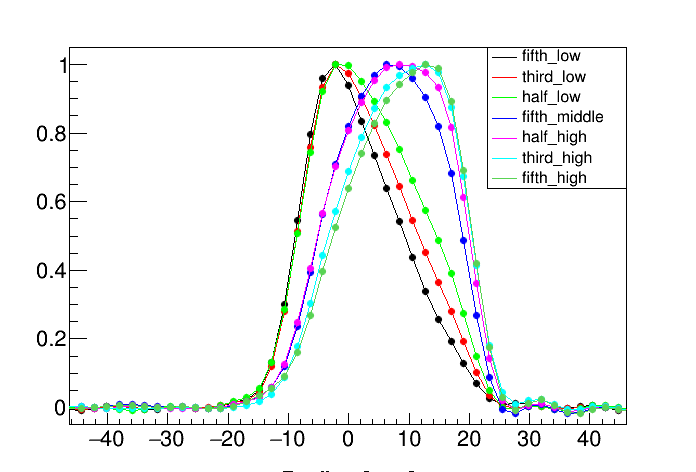

In [103]:
c = r.TCanvas()
leg = r.TLegend(0.7,0.6,0.9,0.9)

for i in range(nDists):
    if(i > 0):
        frdists[i].Draw("pl SAME")
    else:
        frdists[i].Draw("apl")
    frdists[i].SetLineColor(colors[i])
    frdists[i].SetMarkerColor(colors[i])
    leg.AddEntry(frdists[i], distributions[i][0],"l")
leg.Draw("SAME")
c.Draw()

In [104]:
fastRotationHists = []
for i, gri in enumerate(frdists):
    print("Starting", i)
    h_fr = h.Clone("h_fr")
    h_fr.Reset()
    h_fr.SetDirectory(0)

    fr_dict = {}

    for binx in range(0,h.GetNbinsX()+2):
        center = h.GetXaxis().GetBinCenter(binx)
        fr_amplitude = gri.Eval(center)
        norm_factor = gri.Integral()
        if(fr_amplitude > 0):
            fr_dict[binx] = fr_amplitude*norm_factor
        else:
            fr_dict[binx] = 0
        #print(center, fr_amplitude)

    #print(fr_dict)
    for binx in range(0,h.GetNbinsX()+2):
        for biny in range(0, h.GetNbinsY()+2):
            content = h.GetBinContent(binx, biny)
            if(content > 0):
                newContent = content*fr_dict[binx]
                h_fr.SetBinContent(binx,biny,newContent)
                #print(binx, biny, content, fr_dict[binx], newContent)
    fastRotationHists.append(h_fr.Clone("h_fr_"+str(i)))

Starting 0
Starting 1
Starting 2
Starting 3
Starting 4
Starting 5
Starting 6


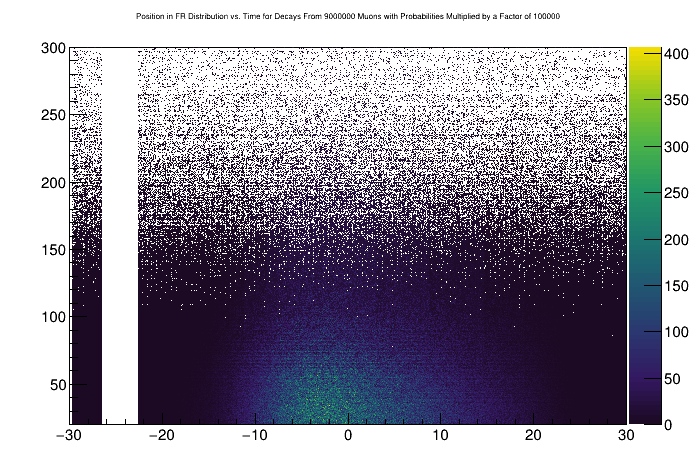

In [105]:
c = r.TCanvas()
fastRotationHists[0].Draw("colz")
#c.SetLogz()
c.Draw()

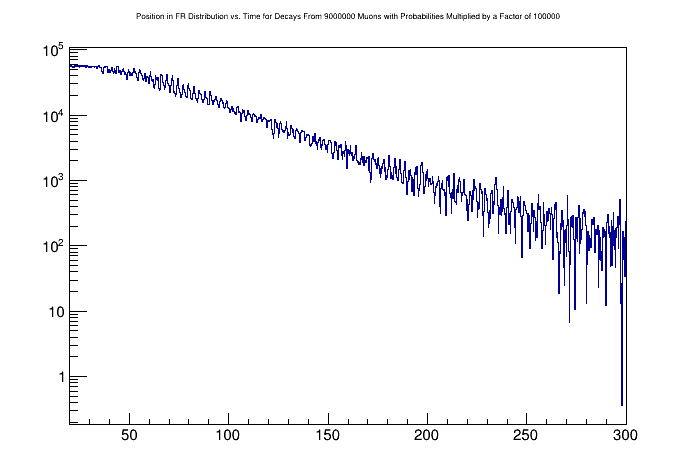

In [106]:
c = r.TCanvas()
fastRotationHists[0].ProjectionY().Draw("colz")
c.SetLogy()
c.Draw()

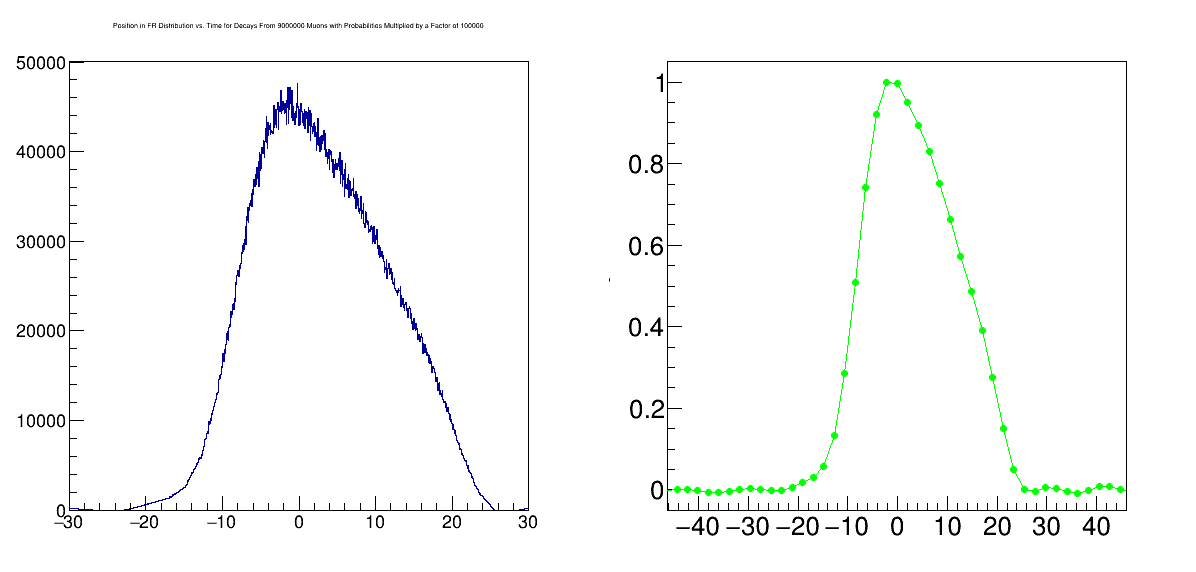

In [107]:
c = r.TCanvas("c","c",1200,600)

i = 2

c.Divide(2)
c.cd(1)
fastRotationHists[i].ProjectionX().Draw("colz")

c.cd(2)
frdists[i].Draw()
c.Draw()

In [108]:
relGraph = r.TGraph()
points = []
for i, hi in enumerate(fastRotationHists):
    content = hi.ProjectionY().Integral(hi.GetYaxis().FindBin(30),-1)
    relGraph.SetPoint(i,i,content)
    points.append(content)
#c = r.TCanvas()
#relGraph.SetMarkerStyle(8)
#relGraph.Draw("ap")
#c.Draw()

['fifth_low', 'third_low', 'half_low', 'fifth_middle', 'half_high', 'third_high', 'fifth_high']


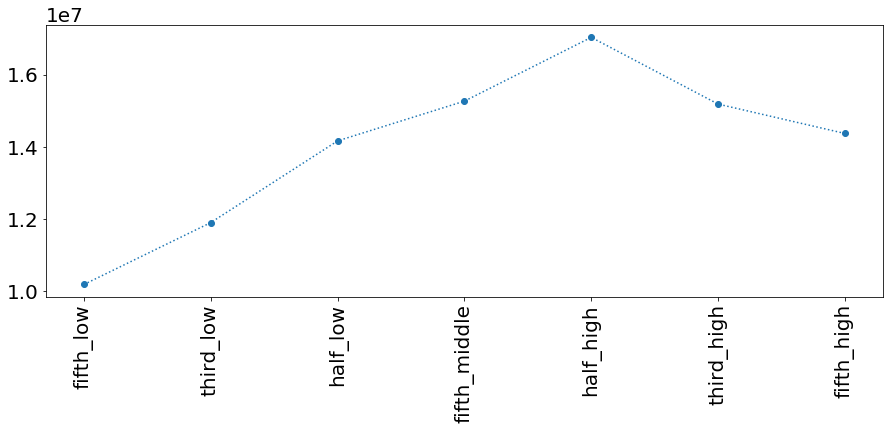

In [109]:
labels = [x[0] for x in distributions]

print(labels)
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(points,"o:")
plt.xticks([i for i in range(len(labels))], labels, rotation=90)
plt.show()